# Finite element method: Working with meshes

We are given five triangular meshes (mesh[1-5].mat), which contain two lists:
 * $p$: The coordinates of the points.
 * $t$: The list of the triangles.
Write a function to plot these triangular meshes. Use this function to plot the meshes 1-4. If the mesh contains less than 20 triangles, enumerate the elements and the points on the plot.

Take the function 
$$
u(x,y) = sin(\pi x) \sin(\pi y)
$$
and plot it on the mesh 4.

Consider the function
$$ v(x,y) = (1-x)^2 \sin(\pi x) \sin(3\pi y) \; .$$
Draw the mesh 5 and plot $v$ on this mesh.

## Solution

We use the Julia module MAT.jl (https://github.com/JuliaIO/MAT.jl) to read the MATLAB *.mat files.

In [1]:
using MAT

tvals = []
pvals = []

for i = 1:5
    vars = matread(string("./ex7_data/mesh", i, ".mat"))
    name = string("mesh", i)
    tf = vars[name]["t"]
    push!(tvals, round.(Int64, tf))
    push!(pvals, vars[name]["p"])    
end

In [2]:
using PyPlot

using PyCall
@pyimport matplotlib as mpl

function plot_mesh(t, p, name; show_numbers=false)
    patches = mpl.pymember("patches")

    fig = figure(figsize=(8,8))#figsize=(15,10))
    ax = fig.add_axes([0.2,0.2,0.7,0.7])
    pas = [patches.Polygon([p[i,:] for i=t[j,:]], closed=true, edgecolor="black", fill=false) for j=1:size(t)[1]]

    for (i, pa) in enumerate(pas)
        ax.add_patch(pa)
        if show_numbers
            coords = pa.get_xy()
            xc = (coords[1,1] + coords[2,1] + coords[3,1] ) / 3
            yc = (coords[1,2] + coords[2,2] + coords[3,2] ) / 3
            ax.annotate(string(i), (xc, yc), ha="center", va="center", fontsize=14)
            
        end
    end
    if show_numbers
        i = 1
        for (x,y) in zip(p[:,1], p[:,2])
                ax.annotate(string(i), (x, y), color="red", ha="left", va="bottom", fontsize=12)
                i += 1
        end
    end
    title(name)
    ax.plot()
end
;

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /home/alex/.julia/packages/PyCall/a5Jd3/src/PyCall.jl:407


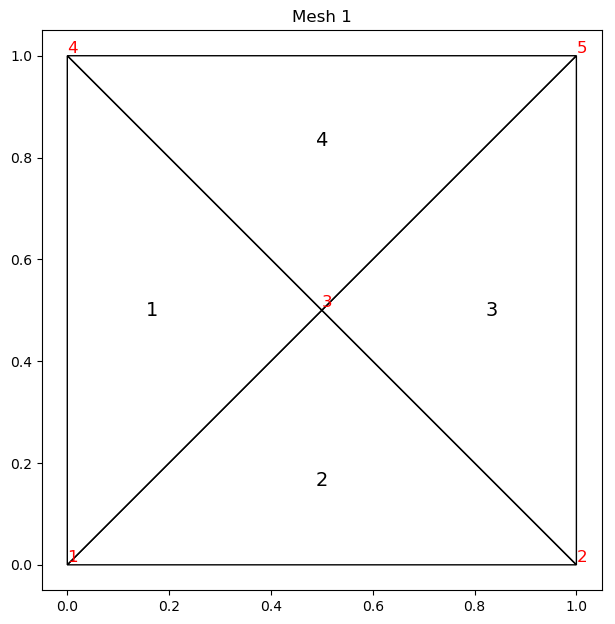

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = pymember at PyCall.jl:387 [inlined]
└ @ Core /home/alex/.julia/packages/PyCall/a5Jd3/src/PyCall.jl:387


In [3]:
plot_mesh(tvals[1], pvals[1], "Mesh 1", show_numbers=true);

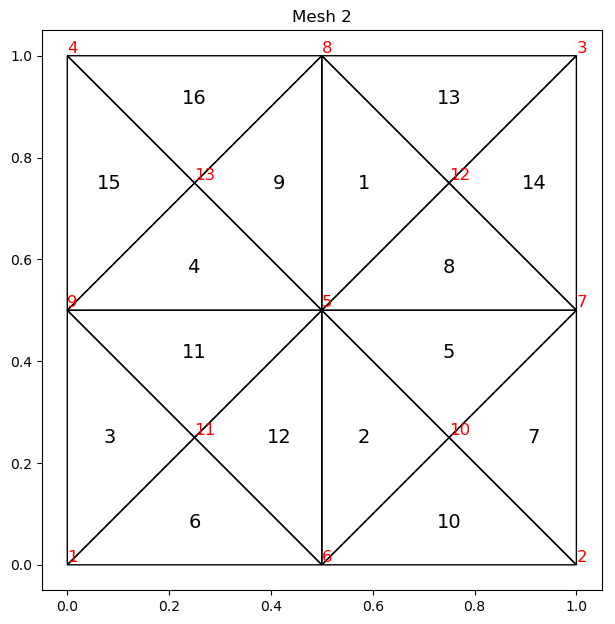

In [4]:
plot_mesh(tvals[2], pvals[2], "Mesh 2", show_numbers=true);

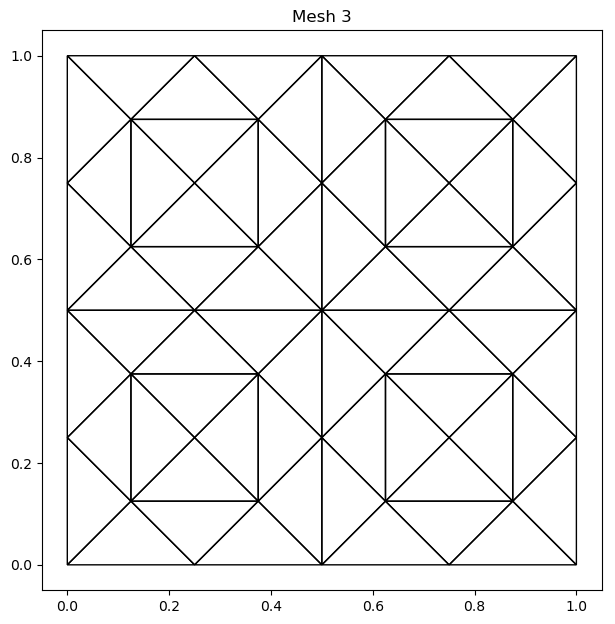

In [5]:
plot_mesh(tvals[3], pvals[3], "Mesh 3", show_numbers=false);

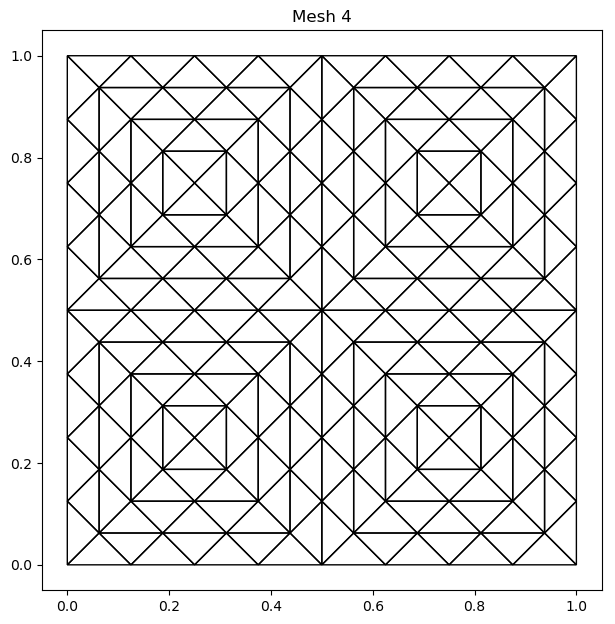

In [6]:
plot_mesh(tvals[4], pvals[4], "Mesh 4", show_numbers=false);

In [7]:
u(x,y) = sin.(pi*x) .* sin.(pi*y);

In [8]:
# TODO: write plotting code to plot functions on triangular grids